## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  74.908789  1193.413189  0.943017  3.461485  1.515859
1   0.591712   653.760560  0.896048  5.662041  1.693870
2  59.524199  1580.509741  0.581094  1.353846  1.385033
3  21.202618   695.541194  0.051690  4.570250  1.062180
4  64.075776  1520.216698  0.334578  4.375476  1.579990


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9577888	total: 59.4ms	remaining: 59.3s
1:	learn: 0.9483692	total: 60.5ms	remaining: 30.2s
2:	learn: 0.9389884	total: 61.3ms	remaining: 20.4s


3:	learn: 0.9299534	total: 62.9ms	remaining: 15.7s
4:	learn: 0.9201536	total: 63.5ms	remaining: 12.6s
5:	learn: 0.9118101	total: 64.4ms	remaining: 10.7s
6:	learn: 0.9019689	total: 67.2ms	remaining: 9.54s
7:	learn: 0.8911447	total: 69.2ms	remaining: 8.59s
8:	learn: 0.8828572	total: 69.9ms	remaining: 7.7s
9:	learn: 0.8730596	total: 70.5ms	remaining: 6.98s
10:	learn: 0.8641686	total: 71.4ms	remaining: 6.42s
11:	learn: 0.8551371	total: 72.9ms	remaining: 6s
12:	learn: 0.8466938	total: 73.4ms	remaining: 5.57s
13:	learn: 0.8369894	total: 74.2ms	remaining: 5.23s
14:	learn: 0.8276993	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8191350	total: 76.4ms	remaining: 4.7s
16:	learn: 0.8111927	total: 76.8ms	remaining: 4.44s
17:	learn: 0.8028770	total: 77.4ms	remaining: 4.22s
18:	learn: 0.7961309	total: 77.9ms	remaining: 4.02s
19:	learn: 0.7886529	total: 78.5ms	remaining: 3.85s
20:	learn: 0.7803552	total: 79ms	remaining: 3.68s
21:	learn: 0.7726494	total: 79.5ms	remaining: 3.53s
22:	learn: 0.7641127	total

193:	learn: 0.2347036	total: 157ms	remaining: 654ms
194:	learn: 0.2337564	total: 158ms	remaining: 653ms
195:	learn: 0.2326495	total: 159ms	remaining: 651ms
196:	learn: 0.2312043	total: 159ms	remaining: 648ms
197:	learn: 0.2302691	total: 160ms	remaining: 646ms
198:	learn: 0.2288662	total: 160ms	remaining: 645ms
199:	learn: 0.2279202	total: 161ms	remaining: 643ms
200:	learn: 0.2267963	total: 161ms	remaining: 640ms
201:	learn: 0.2256878	total: 161ms	remaining: 638ms
202:	learn: 0.2247181	total: 162ms	remaining: 636ms
203:	learn: 0.2235754	total: 162ms	remaining: 634ms
204:	learn: 0.2218660	total: 163ms	remaining: 632ms
205:	learn: 0.2207834	total: 163ms	remaining: 630ms
206:	learn: 0.2197248	total: 164ms	remaining: 628ms
207:	learn: 0.2184984	total: 164ms	remaining: 625ms
208:	learn: 0.2172285	total: 165ms	remaining: 624ms
209:	learn: 0.2162443	total: 166ms	remaining: 623ms
210:	learn: 0.2148812	total: 166ms	remaining: 621ms
211:	learn: 0.2141045	total: 167ms	remaining: 619ms
212:	learn: 

323:	learn: 0.1362709	total: 216ms	remaining: 451ms
324:	learn: 0.1359686	total: 217ms	remaining: 450ms
325:	learn: 0.1351393	total: 217ms	remaining: 449ms
326:	learn: 0.1347874	total: 218ms	remaining: 449ms
327:	learn: 0.1344978	total: 219ms	remaining: 449ms
328:	learn: 0.1336809	total: 219ms	remaining: 447ms
329:	learn: 0.1327636	total: 220ms	remaining: 447ms
330:	learn: 0.1319696	total: 221ms	remaining: 446ms
331:	learn: 0.1317175	total: 221ms	remaining: 445ms
332:	learn: 0.1309396	total: 221ms	remaining: 443ms
333:	learn: 0.1301678	total: 222ms	remaining: 442ms
334:	learn: 0.1293651	total: 222ms	remaining: 441ms
335:	learn: 0.1286195	total: 223ms	remaining: 440ms
336:	learn: 0.1278792	total: 223ms	remaining: 439ms
337:	learn: 0.1270695	total: 223ms	remaining: 438ms
338:	learn: 0.1267534	total: 224ms	remaining: 436ms
339:	learn: 0.1259959	total: 224ms	remaining: 435ms
340:	learn: 0.1257035	total: 225ms	remaining: 434ms
341:	learn: 0.1249955	total: 225ms	remaining: 433ms
342:	learn: 

541:	learn: 0.0623688	total: 316ms	remaining: 267ms
542:	learn: 0.0622273	total: 317ms	remaining: 267ms
543:	learn: 0.0618618	total: 317ms	remaining: 266ms
544:	learn: 0.0615965	total: 318ms	remaining: 265ms
545:	learn: 0.0614980	total: 318ms	remaining: 265ms
546:	learn: 0.0613494	total: 319ms	remaining: 264ms
547:	learn: 0.0610923	total: 319ms	remaining: 263ms
548:	learn: 0.0609568	total: 319ms	remaining: 262ms
549:	learn: 0.0608616	total: 320ms	remaining: 262ms
550:	learn: 0.0605099	total: 320ms	remaining: 261ms
551:	learn: 0.0603663	total: 321ms	remaining: 260ms
552:	learn: 0.0601679	total: 321ms	remaining: 259ms
553:	learn: 0.0600275	total: 321ms	remaining: 259ms
554:	learn: 0.0598337	total: 322ms	remaining: 258ms
555:	learn: 0.0596658	total: 322ms	remaining: 257ms
556:	learn: 0.0592575	total: 324ms	remaining: 257ms
557:	learn: 0.0590135	total: 324ms	remaining: 257ms
558:	learn: 0.0587763	total: 325ms	remaining: 256ms
559:	learn: 0.0585456	total: 325ms	remaining: 255ms
560:	learn: 

676:	learn: 0.0410870	total: 376ms	remaining: 179ms
677:	learn: 0.0410487	total: 378ms	remaining: 180ms
678:	learn: 0.0409855	total: 379ms	remaining: 179ms
679:	learn: 0.0409068	total: 379ms	remaining: 178ms
680:	learn: 0.0408446	total: 379ms	remaining: 178ms
681:	learn: 0.0407506	total: 380ms	remaining: 177ms
682:	learn: 0.0406651	total: 380ms	remaining: 176ms
683:	learn: 0.0406041	total: 381ms	remaining: 176ms
684:	learn: 0.0405442	total: 381ms	remaining: 175ms
685:	learn: 0.0404346	total: 381ms	remaining: 175ms
686:	learn: 0.0403760	total: 382ms	remaining: 174ms
687:	learn: 0.0403185	total: 382ms	remaining: 173ms
688:	learn: 0.0401893	total: 383ms	remaining: 173ms
689:	learn: 0.0401140	total: 383ms	remaining: 172ms
690:	learn: 0.0400651	total: 383ms	remaining: 171ms
691:	learn: 0.0400271	total: 384ms	remaining: 171ms
692:	learn: 0.0399790	total: 384ms	remaining: 170ms
693:	learn: 0.0398533	total: 385ms	remaining: 170ms
694:	learn: 0.0398060	total: 385ms	remaining: 169ms
695:	learn: 

906:	learn: 0.0225527	total: 478ms	remaining: 49ms
907:	learn: 0.0224727	total: 479ms	remaining: 48.5ms
908:	learn: 0.0224303	total: 479ms	remaining: 48ms
909:	learn: 0.0223892	total: 480ms	remaining: 47.5ms
910:	learn: 0.0223120	total: 480ms	remaining: 46.9ms
911:	learn: 0.0222340	total: 481ms	remaining: 46.4ms
912:	learn: 0.0221588	total: 481ms	remaining: 45.9ms
913:	learn: 0.0221432	total: 482ms	remaining: 45.3ms
914:	learn: 0.0220788	total: 482ms	remaining: 44.8ms
915:	learn: 0.0220279	total: 482ms	remaining: 44.2ms
916:	learn: 0.0219449	total: 483ms	remaining: 43.7ms
917:	learn: 0.0218959	total: 483ms	remaining: 43.2ms
918:	learn: 0.0218518	total: 484ms	remaining: 42.7ms
919:	learn: 0.0217294	total: 485ms	remaining: 42.2ms
920:	learn: 0.0217198	total: 485ms	remaining: 41.6ms
921:	learn: 0.0216258	total: 486ms	remaining: 41.1ms
922:	learn: 0.0215453	total: 486ms	remaining: 40.5ms
923:	learn: 0.0215344	total: 486ms	remaining: 40ms
924:	learn: 0.0215250	total: 487ms	remaining: 39.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.37596297700414605


ABC Pre-generator MAE 0.7832721009532998


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

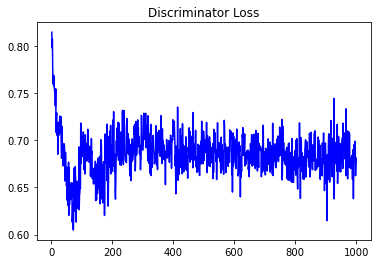

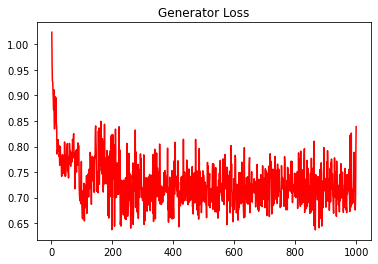

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7847660113098099


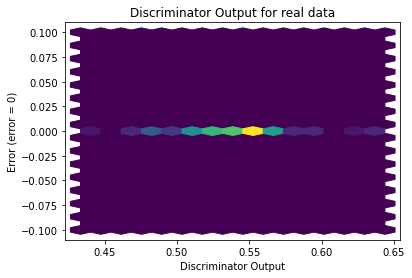

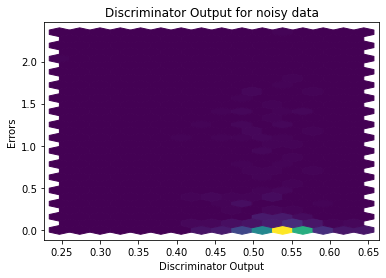

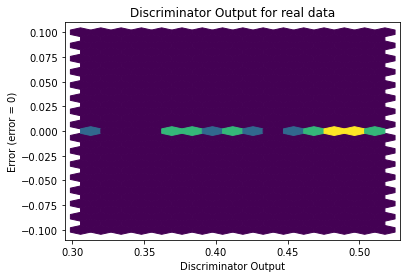

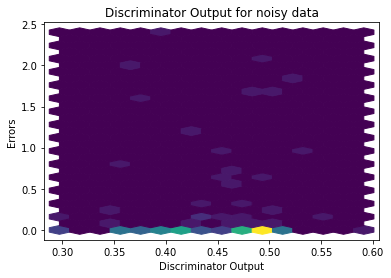

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

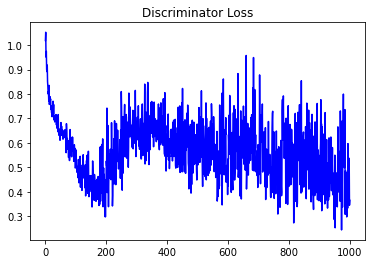

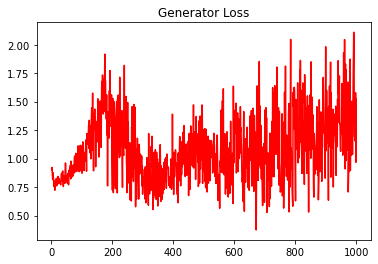

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.1352747033126651


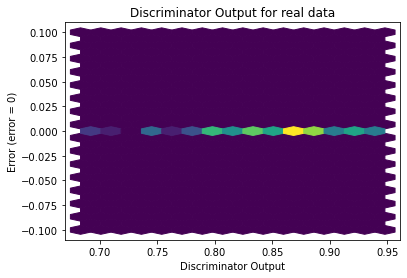

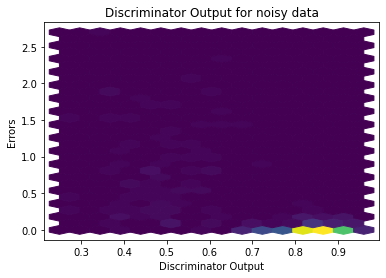

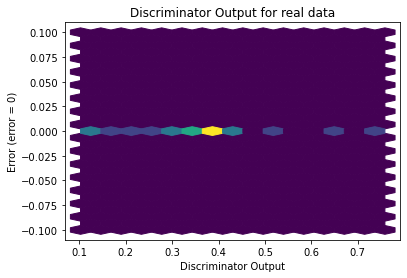

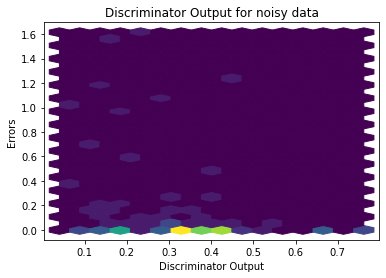

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


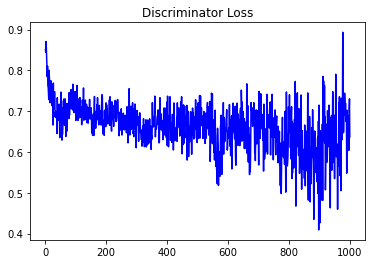

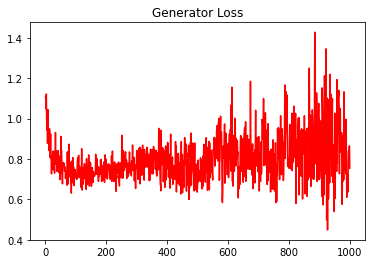

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
2.4209246101900934


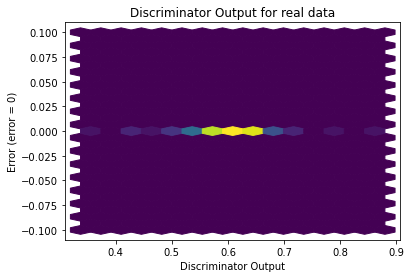

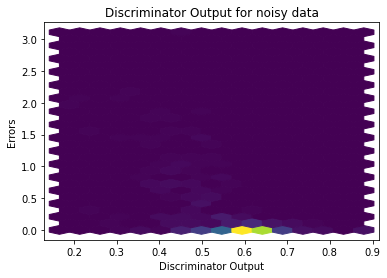

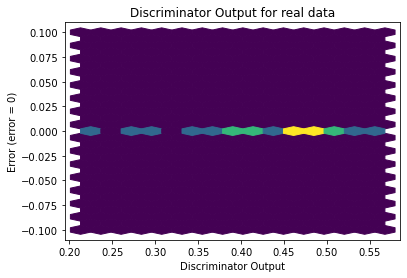

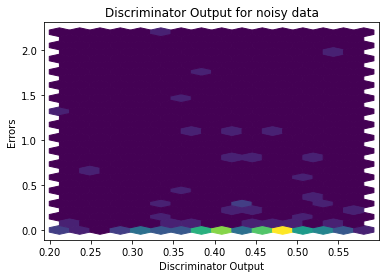

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


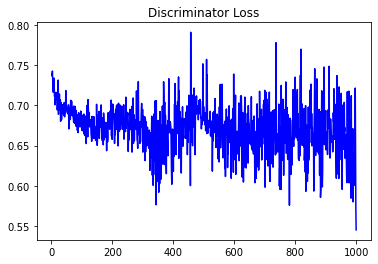

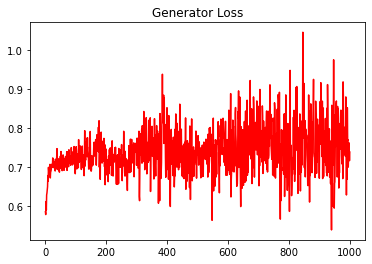

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.8318489152441034


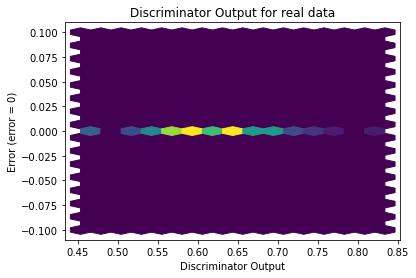

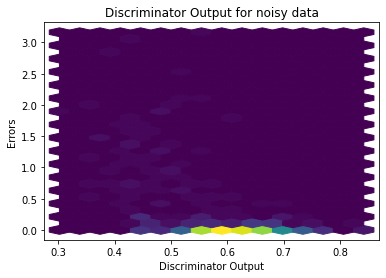

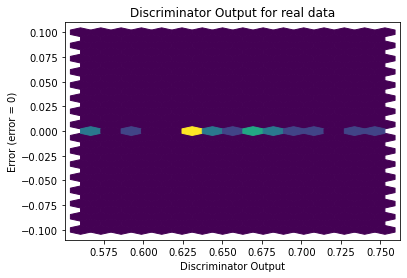

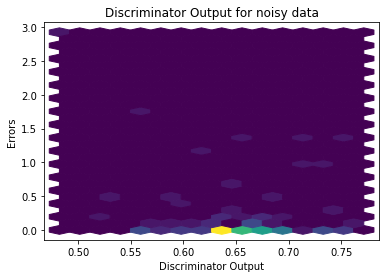

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3411]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3036]], requires_grad=True)
